MP Prep Work

In [173]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [174]:
plt.style.use('fivethirtyeight')

In [112]:
df = pd.read_csv('analytic_data2019.csv')

In [113]:
df.head()

,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,Release Year,County Ranked (Yes=1/No=0),Premature death raw value,Premature death numerator,Premature death denominator,...,Male population 18-44 raw value,Male population 45-64 raw value,Male population 65+ raw value,Total male population raw value,Female population 0-17 raw value,Female population 18-44 raw value,Female population 45-64 raw value,Female population 65+ raw value,Total female population raw value,Population growth raw value
0,statecode,countycode,fipscode,state,county,year,county_ranked,v001_rawvalue,v001_numerator,v001_denominator,...,v013_rawvalue,v016_rawvalue,v017_rawvalue,v025_rawvalue,v026_rawvalue,v027_rawvalue,v031_rawvalue,v032_rawvalue,v035_rawvalue,v097_rawvalue
1,00,000,00000,US,United States,2019,NaN,6900.630354,3745538,908266078,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01,000,01000,AL,Alabama,2019,NaN,9917.2328984,80440,13636816,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01,001,01001,AL,Autauga County,2019,1,8824.0571232,815,156132,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01,003,01003,AL,Baldwin County,2019,1,7224.6321603,2827,576496,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [115]:
columns_to_drop = []
for column in df.columns[6:]:
    if not (df[column][0]).endswith('rawvalue'):
        columns_to_drop.append(column)
        
df.drop(columns_to_drop, inplace = True, axis = 1)

In [116]:
df.drop(0, axis = 0, inplace = True)

In [117]:
df.shape

(3194, 111)

In [118]:
df = df[df['County FIPS Code'] != '000']

In [120]:
df.shape

(3142, 111)

In [119]:
df = df[df['County FIPS Code'] != 0]

In [66]:
df.shape

(3142, 111)

As of 2016, there were 3,007 counties, 64 parishes, 19 organized boroughs, 10 census areas, 41 independent cities, and the District of Columbia for a total of 3,142 counties and county-equivalents in the 50 states and District of Columbia.

In [138]:
df['State Abbreviation'].value_counts()

TX    254
GA    159
VA    133
KY    120
MO    115
KS    105
IL    102
NC    100
IA     99
TN     95
NE     93
IN     92
OH     88
MN     87
MI     83
MS     82
OK     77
AR     75
WI     72
FL     67
AL     67
PA     67
SD     66
LA     64
CO     64
NY     62
CA     58
MT     56
WV     55
ND     53
SC     46
ID     44
WA     39
OR     36
NM     33
UT     29
AK     29
MD     24
WY     23
NJ     21
NV     17
ME     16
AZ     15
MA     14
VT     14
NH     10
CT      8
RI      5
HI      5
DE      3
DC      1
Name: State Abbreviation, dtype: int64

In [121]:
df['Female population 45-64 raw value'].isna().sum()

3070

In [122]:
# for column in df.columns:
#     print("Missing values from " + column + " : " + str(df[column].isna().sum()))

In [123]:
columns_to_drop = []
for column in df.columns:
    if df[column].isna().sum() > len(df) / 10:
        columns_to_drop.append(column)
        
df.drop(columns_to_drop, axis = 1, inplace = True)

In [124]:
df_missing_values = pd.DataFrame()

missing_number = []
column_name = []

for column in df.columns:
    column_name.append(column)
    missing_number.append(df[column].isna().sum())
    
df_missing_values['column_name'] = column_name
df_missing_values['missing_number'] = missing_number

In [125]:
df_missing_values = df_missing_values.sort_values('missing_number', ascending = False)

In [126]:
df_missing_values.head(20)

,column_name,missing_number
23,Mental health providers raw value,252
34,Violent crime raw value,191
18,Sexually transmitted infections raw value,158
19,Teen births raw value,144
21,Primary care physicians raw value,135
53,Children eligible for free or reduced price lu...,121
10,Low birthweight raw value,107
35,Injury deaths raw value,103
27,High school graduation raw value,99
22,Dentists raw value,85


In [128]:
np.sort(df.isnull().sum(axis=1))

array([ 0,  0,  0, ..., 13, 13, 23])

In [129]:
df[df.isnull().sum(axis=1)>10]

,State FIPS Code,County FIPS Code,5-digit FIPS Code,State Abbreviation,Name,Release Year,Premature death raw value,Poor or fair health raw value,Poor physical health days raw value,Poor mental health days raw value,...,% 65 and older raw value,% Non-Hispanic African American raw value,% American Indian and Alaskan Native raw value,% Asian raw value,% Native Hawaiian/Other Pacific Islander raw value,% Hispanic raw value,% Non-Hispanic white raw value,% not proficient in English raw value,% Females raw value,% Rural raw value
71,02,013,02013,AK,Aleutians East Borough,2019,NaN,0.1674102301,3.4184644667,2.7264742276,...,0.0902077151,0.1017804154,0.2077151335,0.4175074184,0.0139465875,0.1370919881,0.0991097923,0.10980876,0.3198813056,1
80,02,105,02105,AK,Hoonah-Angoon Census Area,2019,7824.9275219,0.1728048772,4.10577138,3.7768453624,...,0.2223776224,0.0093240093,0.3897435897,0.0149184149,0.0004662005,0.0554778555,0.4634032634,0,0.4680652681,NaN
91,02,195,02195,AK,Petersburg Census Area,2019,9433.0888164,0.1315746697,3.3757655322,3.1096900909,...,0.1843950015,0.016763182,0.1094178604,0.0295641573,0.0128009753,0.0600426699,0.7110637001,0.0045796533,0.4690643097,NaN
94,02,230,02230,AK,Skagway Municipality,2019,NaN,0.1072976694,2.9608035893,2.8813490977,...,0.1477960242,0.0069144339,0.0501296456,0.0198789974,0.0025929127,0.0492653414,0.8254105445,0.0040120361,0.4831460674,NaN
97,02,275,02275,AK,Wrangell City,2019,6286.7242293,0.1562533313,3.7944392034,3.5055986272,...,0.2237207457,0.0047600159,0.1630305434,0.0249900833,0.001190004,0.0249900833,0.6870289568,0.0114309907,0.4732249107,NaN
98,02,282,02282,AK,Yakutat Borough,2019,NaN,0.1809969356,4.168482261,3.7772690709,...,0.1834710744,0.0198347107,0.3950413223,0.0545454545,0.0132231405,0.0495867769,0.3338842975,0.0189274448,0.4462809917,1
562,15,005,15005,HI,Kalawao County,2019,NaN,0.1401714924,3.2144589883,3.1712727075,...,0.3863636364,0,0,0.0909090909,0.4772727273,0.0113636364,0.2613636364,0.0714285714,0.5227272727,1
1687,31,7,31007,NE,Banner County,2019,NaN,0.141624,3.09411,3.14506,...,0.233154,0.0202156,0.00269542,0,0,0.0592992,0.909704,0,0.518868,1
2719,48,301,48301,TX,Loving County,2019,NaN,0.183703,3.61875,3.68014,...,0.0895522,0.0373134,0.00746269,0,0,0.19403,0.761194,0.0405405,0.462687,1


In [143]:
rename_dictionary = {
    'State FIPS Code' : 'FIPS_state', 
    'County FIPS Code' : 'FIPS_county',
    '5-digit FIPS Code': 'FIPS_full',
    'State Abbreviation' : 'state', 
    'Name': 'county',
    'Release Year' : 'year',
    'Premature death raw value' : 'YPLL', 
    'Poor or fair health raw value' : 'poor_health',
    'Poor physical health days raw value': 'poor_physical_health_days',
    'Poor mental health days raw value': 'poor_mental_health_days', 
    'Low birthweight raw value' : 'LBW',
    'Adult smoking raw value': 'smokers', 
    'Adult obesity raw value' : 'obese' ,
    'Food environment index raw value' : 'food_environment_index', 
    'Physical inactivity raw value' : 'physically_inactive',
    'Access to exercise opportunities raw value' : 'exercise_acces',
    'Excessive drinking raw value' : 'excessive_drinking',
    'Alcohol-impaired driving deaths raw value' : 'alcohol_impaired_driving_deaths',
    'Sexually transmitted infections raw value' : 'chlamydia_rate', 
    'Teen births raw value' : 'teen_birth_rate',
    'Uninsured raw value' : 'uninsured', 
    'Primary care physicians raw value': 'PCP',
    'Dentists raw value': 'dentists', 
    'Mental health providers raw value' : 'MHP',
    'Preventable hospital stays raw value': 'preventable_hospital_stays',
    'Mammography screening raw value' : 'mammography_screenings', 
    'Flu vaccinations raw value' : 'flu_vaccinated',
    'High school graduation raw value' : 'high_school_graduation', 
    'Some college raw value' : 'college',
    'Unemployment raw value' : 'unemployment', 
    'Children in poverty raw value' : 'children_in_oiverty',
    'Income inequality raw value' : 'income_inequality',
    'Children in single-parent households raw value' : 'children_in_singleparent_household',
    'Social associations raw value' : 'social_associations', 
    'Violent crime raw value' : 'violent_crime',
    'Injury deaths raw value' : 'injury_deaths',
    'Air pollution - particulate matter raw value' : 'air_pollution',
    'Drinking water violations raw value' : 'water_violation',
    'Severe housing problems raw value': 'severe_housing_problems', 
    'Driving alone to work raw value' : 'driving_alone_work',
    'Long commute - driving alone raw value': 'driving_alone_longcommute', 
    'Life expectancy raw value' : 'life_expectancy',
    'Premature age-adjusted mortality raw value' : 'premature_age_adjusted_mortality',
    'Frequent physical distress raw value' : 'frequent_physical_distress',
    'Frequent mental distress raw value' : 'frequent_mental_distress', 
    'Diabetes prevalence raw value' : 'diabetes',
    'Food insecurity raw value' : 'food_insecurity',
    'Limited access to healthy foods raw value' : 'healthy_food_acces',
    'Insufficient sleep raw value': 'insufficient_sleep', 
    'Uninsured adults raw value': 'uninsured_adults',
    'Uninsured children raw value' : 'uninsured_children',
    'Other primary care providers raw value' : 'other_primary_care_providers',
    'Median household income raw value' : 'median_household_income',
    'Children eligible for free or reduced price lunch raw value' : 'children_elig_lunch',
    'Homeownership raw value' : 'homeownership', 
    'Severe housing cost burden raw value' : 'severe_housing_cost_burden',
    'Population raw value' : 'population', 
    '% below 18 years of age raw value' : 'below_age18',
    '% 65 and older raw value' : 'above_age65', 
    '% Non-Hispanic African American raw value' : 'nonhisp_africanamerican',
    '% American Indian and Alaskan Native raw value' : 'americanindian_alaskannative', 
    '% Asian raw value' : 'asian',
    '% Native Hawaiian/Other Pacific Islander raw value' : 'nativehawaiian_otherpacific',
    '% Hispanic raw value' : 'hispanic', 
    '% Non-Hispanic white raw value' : 'nonhispanic_whit',
    '% not proficient in English raw value' : 'notproficient_english', 
    '% Females raw value' : 'females',
    '% Rural raw value' : 'rural'
}

In [146]:
df.rename(columns=rename_dictionary, inplace = True);

In [147]:
df.head()

,FIPS_state,FIPS_county,FIPS_full,state,county,year,YPLL,poor_health,poor_physical_health_days,poor_mental_health_days,...,above_age65,nonhisp_africanamerican,americanindian_alaskannative,asian,nativehawaiian_otherpacific,hispanic,nonhispanic_whit,notproficient_english,females,rural
3,01,001,01001,AL,Autauga County,2019,8824.0571232,0.1841112436,4.2005779826,4.3067392835,...,0.1511963102,0.1925446815,0.004756414,0.0127918709,0.0010449697,0.0285745172,0.7447391179,0.0082854831,0.513422456,0.4200216232
4,01,003,01003,AL,Baldwin County,2019,7224.6321603,0.1806045782,4.0987477691,4.2496487805,...,0.1994704366,0.0895319525,0.0077600316,0.0115647986,0.0006866452,0.0455020035,0.8304738793,0.0045451229,0.5145277198,0.4227909911
5,01,005,01005,AL,Barbour County,2019,9586.165037,0.2577341563,5.0674383044,4.634994147,...,0.1882469331,0.4794222398,0.0065294816,0.004629996,0.0018599129,0.0420656905,0.4595567867,0.0119927317,0.472299169,0.677896347
6,01,007,01007,AL,Bibb County,2019,11783.543675,0.1999691186,4.3633772783,4.3157100192,...,0.1602258691,0.2145756132,0.00427916,0.0022057526,0.0011469914,0.0263808011,0.7429857067,0.0039434768,0.4645314981,0.6835260746
7,01,009,01009,AL,Blount County,2019,10908.101822,0.2109532316,4.5127526482,4.7015992588,...,0.1784255253,0.0146001758,0.0063261683,0.0030165653,0.0011721511,0.0956509748,0.8694430559,0.0187000425,0.5068863875,0.8995150204


In [151]:
for column in df.columns[6:]:
    df[column] = df[column].map(lambda x: float(x))

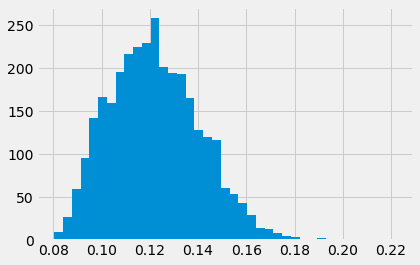

In [175]:
plt.hist(df['frequent_mental_distress'], bins = 'auto')
plt.show()

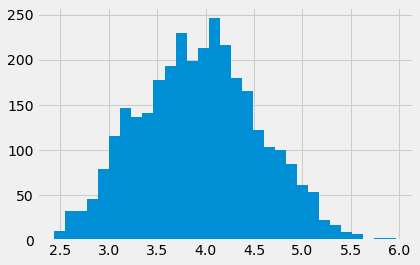

In [176]:
plt.hist(df['poor_mental_health_days'], bins = 'auto')
plt.show()

In [177]:
df[['poor_mental_health_days', 'frequent_mental_distress']].corr()

,poor_mental_health_days,frequent_mental_distress
poor_mental_health_days,1.000000,0.953254
frequent_mental_distress,0.953254,1.000000


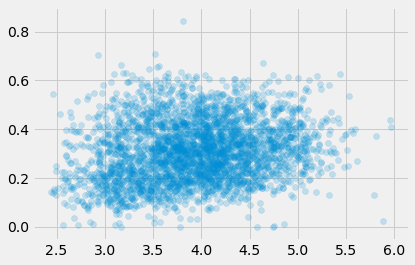

In [181]:
plt.figsize = (10,10)
plt.scatter(df['poor_mental_health_days'], df['driving_alone_longcommute'], alpha = 0.2)

In [179]:
df['frequent_mental_distress'].isna().sum()

0

In [188]:
df.to_csv('usable_data.csv', index = False)

In [189]:
df = pd.read_csv('usable_data.csv')

In [199]:
# def fill_missing_values(state_column, value_column):
#     # TODO add state
    
# #     print(type(value_column))
    
#     choice = sorted(value_column.unique())
# # prob = df[df.user_score != 'tbd']['user_score'].value_counts(normalize=True).sort_index()
# # df['user_score'] = df.user_score.map(lambda x: np.random.choice(choice, 1, p= prob)[0] if x == 'tbd' else x)
    
#     return choice
    

In [201]:
choice = fill_missing_values(df['state'], df['MHP'])

In [203]:
np.array(choice).isna().sum()

AttributeError: 'numpy.ndarray' object has no attribute 'isna'

In [210]:
df['MHP'].fillna('tbd', inplace = True)

In [215]:
choice = sorted(df[df['MHP'] != 'tbd']['MHP'].unique())
prob = df[df['MHP'] != 'tbd']['MHP'].value_counts(normalize=True).sort_index()
df['MHP_filled'] = df['MHP'].map(lambda x: np.random.choice(choice, 1, p = prob)[0] if x == 'tbd' else x)

In [219]:
df[df['MHP'] != df['MHP_filled']]['MHP']

11      tbd
42      tbd
72      tbd
117     tbd
123     tbd
       ... 
2867    tbd
2903    tbd
2935    tbd
3065    tbd
3093    tbd
Name: MHP, Length: 252, dtype: object

In [187]:
df.groupby('state')['MHP'].mean()* 10000;

In [ ]:
def fill_missing_values(df, column_list)

In [225]:
state_dict = {}

for state in df['state'].unique():
    
    df_per_state = df[df['state']==state]
    
    choice = sorted(df_per_state[df_per_state['MHP'] != 'tbd']['MHP'].unique())
    prob = df_per_state[df_per_state['MHP'] != 'tbd']['MHP'].value_counts(normalize=True).sort_index()
    
    state_dict[state] = (choice, prob)
    
#     df_per_state['MHP_filled_2'] = df_per_state['MHP'].map(
#         lambda x: np.random.choice(choice, 1, p = prob)[0] if x == 'tbd' else x
#     )